In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
AIRLINES_FILE_CLEANED_CSV = "../data/cleaned/cleaned_earth_airlines.csv"
AIRLINES_FILE_CLEANED_JSON = "../data/cleaned/cleaned_earth_airlines.json"

EU_COUNTRIES_FILE_CLEANED_CSV = "../data/cleaned/eu_cleaned_countries_2019.csv"

EU_AIRLINES_FILE_CLEANED_CSV = "../data/cleaned/eu_cleaned_airlines_2019.csv"
EU_AIRLINES_FILE_CLEANED_JSON = "../data/cleaned/eu_cleaned_airlines_2019.json"

# Read Airline Data

In [3]:
all_airlines_df = pd.read_csv(AIRLINES_FILE_CLEANED_CSV, 
                              index_col = 0, 
                              header=0)

In [4]:
eu_countries_df = pd.read_csv(EU_COUNTRIES_FILE_CLEANED_CSV, 
                              index_col = 0, 
                              header=0)

In [5]:
with open(AIRLINES_FILE_CLEANED_JSON) as f:
    all_airlines = json.load(f)

# Airline Data Cleaning

In [6]:
eu_countries_list = eu_countries_df['country'].values

eu_airlines_df = all_airlines_df[all_airlines_df['Country'].isin(eu_countries_list)]

In [7]:
eu_airlines_df.reset_index(drop=True, inplace=True)
eu_airlines_df.head()

,Name,IATA,Country
0,Aigle Azur,ZI,France
1,Air Europa,UX,Spain
2,Aegean Airlines,A3,Greece
3,Air Europe,PE,Italy
4,Air Italy,I9,Italy


# Create JSON Data

In [8]:
eu_airlines_json = {}

eu_airlines_count = len(eu_airlines_df)

for airline_index in range(eu_airlines_count):
    airline_data = eu_airlines_df.iloc[airline_index]
    airline_code = airline_data["IATA"]
    eu_airlines_json[airline_code] = all_airlines[airline_code]

# Airline Visulization

In [9]:
no_of_countries = len(eu_airlines_df["Country"].value_counts())
print("number of countries:", no_of_countries)

number of countries: 25


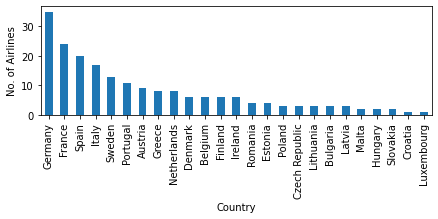

In [10]:
plt.close("all")
plt.figure()
name_plt = eu_airlines_df["Country"].value_counts().plot(kind='bar',figsize=(7,2))
name_plt.set_xlabel("Country")
name_plt.set_ylabel("No. of Airlines")
plt.show()

# Save Airline Data

In [11]:
eu_airlines_df.to_csv(EU_AIRLINES_FILE_CLEANED_CSV)

In [12]:
with open(EU_AIRLINES_FILE_CLEANED_JSON, 'w') as fp:
    json.dump(eu_airlines_json, fp)